# Numpy

In [1]:
# Установим numpy, если нужно
!pip install numpy

In [2]:
import numpy as np

## [Интернет](https://pythonworld.ru/numpy/1.html) говорит:

<b>NumPy</b> — это библиотека языка Python, добавляющая поддержку больших многомерных массивов и матриц, вместе с большой библиотекой высокоуровневых (и очень быстрых) математических функций для операций с этими массивами.

Мотивирующая картинка

![](https://i.ibb.co/d0sJYtC/z4GzOX6.png)

Основная единица - массив ([np.ndarray](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html)) (вектор, матрица, тензор, etc..)

In [3]:
np.array([1, 2, 3])

array([1, 2, 3])

In [4]:
np.array([1, 2, 3]).shape

(3,)

### Похож на обычный список (list) в питоне, но есть различия

#### Различие номер раз:

In [5]:
[1, 2, 'a']

[1, 2, 'a']

In [7]:
np.array([1, 2, 'a'])

array(['1', '2', 'a'], dtype='<U21')

Т.е. все элементы массива должны быть одного типа

In [8]:
np.array([1, 2, 1]) # теперь тип всех элементов -- это инт

array([1, 2, 1])

#### Различие номер два:

In [9]:
a = [1, 2, 3]
a.append(4)
a

[1, 2, 3, 4]

In [10]:
a = np.array([1, 2, 3])
a.append(4)

AttributeError: 'numpy.ndarray' object has no attribute 'append'

Т.е. размер конкретного массива фиксирован

Добавить элементов конечно можно:

In [11]:
a = np.array([1, 2, 3, 4])
print(id(a))
a = np.append(a, [1])
print(id(a))

4550034256
4511701632


In [28]:
a

array([1, 2, 3, 4, 1])

Но это будет уже новый объект. В отличае от стандартного списка:

In [12]:
a = [1, 2, 3]
print(id(a))
a.append(1)
id(a)

4512703232


4512703232

#### Различие номер три

Надо быть аккуратнее с типами данных: типы в numpy немного отличаются от стандартных питоновских типов

In [13]:
a = [1, 2, 3]
a[0] += 1232234234234324353453453
a

[1232234234234324353453454, 2, 3]

In [14]:
b = np.array([1, 2, 3])
b[0] += 1232234234234324353453453

OverflowError: Python int too large to convert to C long

In [15]:
print(type(a[0]), type(b[0]))

<class 'int'> <class 'numpy.int64'>


### Как можно получить нампаевский массив:

#### уже видели, что из питонячих структур:

In [16]:
np.array([2, 3])

array([2, 3])

In [17]:
np.array([[1, 2], [3, 4]])

array([[1, 2],
       [3, 4]])

#### есть так же различные генераторы:

In [21]:
np.ones(3)

array([1., 1., 1.])

In [22]:
np.zeros(2)

array([0., 0.])

In [23]:
np.ones((2, 2))

array([[1., 1.],
       [1., 1.]])

In [39]:
np.arange(0, 10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [24]:
range(0, 5, 0.5)

TypeError: 'float' object cannot be interpreted as an integer

In [25]:
np.arange(0.5, 10.5, 1.1)

array([ 0.5,  1.6,  2.7,  3.8,  4.9,  6. ,  7.1,  8.2,  9.3, 10.4])

In [45]:
np.linspace(10.1, 20.3, 10)

array([10.1       , 11.23333333, 12.36666667, 13.5       , 14.63333333,
       15.76666667, 16.9       , 18.03333333, 19.16666667, 20.3       ])

In [49]:
np.logspace(1, 2, 3)

array([ 10.       ,  31.6227766, 100.       ])

In [27]:
np.logspace(-5, -10, 5)

array([1.00000000e-05, 5.62341325e-07, 3.16227766e-08, 1.77827941e-09,
       1.00000000e-10])

In [30]:
np.eye(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [31]:
np.diag([1, 2, 3])

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

И наверняка есть еще куча способов, про которые забыл, но про которые можно почитать в [доке](https://numpy.org/doc/stable/). 

Важно: для создания numpy массивов лучше пользоваться именно встроенными генераторами везде, где это возможно, поскольку они хорошо оптимизированы и работают намного быстрее списков.

In [32]:
%%timeit

n = 1000
np.zeros(n)

968 ns ± 7.21 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [33]:
%%timeit

n = 1000
np.array([0 for _ in range(n)])

80.6 µs ± 417 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


### Индексация:

In [34]:
a = np.array([1, 2, 3, 4])

In [35]:
a[0], a[1], a[-1]

(1, 2, 4)

In [36]:
a[1:3]

array([2, 3])

In [37]:
a = np.random.randn(3, 3)

In [38]:
a

array([[-0.58401934,  1.4218785 ,  0.5808294 ],
       [-0.66779519, -0.20622621, -0.69871968],
       [-0.78022778,  0.64137778,  0.6976146 ]])

In [39]:
a.shape

(3, 3)

In [11]:
a.shape[0]

3

In [40]:
a[0]

array([-0.58401934,  1.4218785 ,  0.5808294 ])

In [44]:
a[0, :]

array([-0.58401934,  1.4218785 ,  0.5808294 ])

In [45]:
a[:, 0]

array([-0.58401934, -0.66779519, -0.78022778])

In [48]:
a[0, 0]

-0.5840193369535515

In [49]:
a[0][0]

-0.5840193369535515

а как правильнее?

In [50]:
a = np.random.randn(3, 4, 5, 6)

In [51]:
a.shape

(3, 4, 5, 6)

In [52]:
a[0].shape

(4, 5, 6)

In [53]:
a[0, 0].shape

(5, 6)

### Изменение размеров массива

### То, ради чего все затеяно:

In [54]:
import math

In [55]:
a = [i for i in range(10)]

b = [i ** 2 for i in range(10)]

for i in range(len(a)):
    a[i] += b[i]
a

[0, 2, 6, 12, 20, 30, 42, 56, 72, 90]

In [56]:

a = np.arange(10)
b = np.arange(10) ** 2

a += b
a

array([ 0,  2,  6, 12, 20, 30, 42, 56, 72, 90])

In [57]:
np.sin(a)

array([ 0.        ,  0.90929743, -0.2794155 , -0.53657292,  0.91294525,
       -0.98803162, -0.91652155, -0.521551  ,  0.25382336,  0.89399666])

In [58]:
np.exp(a)

array([1.00000000e+00, 7.38905610e+00, 4.03428793e+02, 1.62754791e+05,
       4.85165195e+08, 1.06864746e+13, 1.73927494e+18, 2.09165950e+24,
       1.85867175e+31, 1.22040329e+39])

In [59]:
a * b

array([   0,    2,   24,  108,  320,  750, 1512, 2744, 4608, 7290])

In [60]:
(a * b).sum() #  чему эквивалентна эта операция?

17358

#### Многие нампайные функции можно применять и к числам:

In [61]:
np.sin(1)

0.8414709848078965

Но зачастую не надо

In [62]:
import math

In [63]:
%timeit math.exp(1)

85.6 ns ± 2.35 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [64]:
%timeit np.exp(1)

924 ns ± 23.2 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


https://twitter.com/karpathy/status/1430316576016793600

Представьте, скольких денег могло стоить (или стоило) Тесле незнание этого факта?:)

#### Зато векторные операции работают намного быстрее

In [65]:
def sin_of_num(x):
    return math.sin(x)

a = np.arange(1000)

In [66]:
%timeit np.sin(a)

11.1 µs ± 57.5 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [67]:
%%timeit

for i in range(a.shape[0]):
    a[i] = sin_of_num(a[i])

328 µs ± 3.32 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


#### А еще многие операции можно ускорить, сделав их векторными

In [68]:
sin_of_vector = np.vectorize(sin_of_num)
a = np.arange(1000)

In [69]:
%%timeit

sin_of_vector(a)

199 µs ± 4.94 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Общее правило - всегда пытайтесь избегать циклы там, где это можно сделать. Если нужно изменить все значения в массиве - используйте встроенную в numpy функцию, либо векторизуйте свою функцию. np.vectorize можно использовать и как декоратор:

In [71]:
@np.vectorize
def sin_of_num(x):
    return math.sin(x)

sin_of_num(a)
pass

Если хочется ускорить свои функции еще сильнее, то можно ознакомиться с библиотекой [numba](https://habr.com/ru/post/484136/) и повысить производительность numpy до уровня C.

### В случае многомерных данных:

In [72]:
a = np.random.randint(0, 10, size=(5, 3))

In [73]:
a.shape

(5, 3)

In [74]:
a

array([[1, 7, 4],
       [0, 1, 6],
       [0, 6, 2],
       [3, 7, 8],
       [4, 6, 1]])

In [35]:
a.sum(), np.sum(a)

(81, 81)

In [75]:
a.sum(axis=0), np.sum(a, axis=0), a.mean(axis=0)

(array([ 8, 27, 21]), array([ 8, 27, 21]), array([1.6, 5.4, 4.2]))

In [76]:
a.sum(axis=1), np.sum(a, axis=1)

(array([12,  7,  8, 18, 11]), array([12,  7,  8, 18, 11]))

In [77]:
a = np.random.randint(0, 10, size=(2, 3, 2, 3))

In [81]:
a.sum(axis=(0, 1))

array([[26, 25, 21],
       [23, 38, 41]])

Отрицательные числа тоже можно использовать

In [82]:
a.sum(axis=(-1, -2))

array([[20, 25, 31],
       [29, 37, 32]])

### Можно поиграться с формой массивов

In [83]:
a = np.random.randint(0, 10, (4, 3))

In [84]:
a

array([[8, 9, 4],
       [6, 0, 5],
       [3, 3, 2],
       [1, 5, 2]])

In [50]:
a.shape

(4, 3)

In [85]:
a.reshape((3, 4))

array([[8, 9, 4, 6],
       [0, 5, 3, 3],
       [2, 1, 5, 2]])

In [89]:
a.reshape(12)

array([8, 9, 4, 6, 0, 5, 3, 3, 2, 1, 5, 2])

In [90]:
a.flatten()

array([8, 9, 4, 6, 0, 5, 3, 3, 2, 1, 5, 2])

### Еще можно удобно менять размерность

In [91]:
a = np.arange(5)
a.shape

(5,)

In [76]:
a

array([0, 1, 2, 3, 4])

In [92]:
a = np.expand_dims(a, axis=0)
a.shape

(1, 5)

In [78]:
a

array([[0, 1, 2, 3, 4]])

In [93]:
a = np.expand_dims(a, axis=2)
a.shape

(1, 5, 1)

In [94]:
a = np.squeeze(a)
a.shape

(5,)

In [99]:
a = np.random.randint(0, 10, (3, 4, 56, 7))

In [101]:
a[..., None].shape

(3, 4, 56, 7, 1)

### Перемножать и обращать матрицы тоже можно

In [102]:
a = np.random.randn(3, 4)
b = np.random.randn(4, 5)

In [103]:
a.dot(b)

array([[ 3.68948871, -2.18045948, -0.55192949,  2.94963121, -1.9484484 ],
       [-3.49560489,  1.85052886,  0.80613652, -3.07119897,  2.45654065],
       [ 0.47947101,  0.82563828, -0.99262159,  0.85857907, -0.40367345]])

In [104]:
a.dot(b).shape

(3, 5)

In [105]:
a = np.random.randn(4, 4)

При помощи модуля linalg можно делать крутые операции над матрицами:

In [106]:
np.linalg.inv(a)

array([[-0.58503146, -0.25558909,  0.26434746,  0.69237792],
       [-0.61595645,  1.37030924, -0.42806978, -0.04651916],
       [-0.43623956, -2.4700193 ,  1.2623567 , -0.45253121],
       [-1.01690498, -0.84437999,  0.13403434,  0.06648683]])

In [107]:
np.linalg.inv(a).dot(a)

array([[ 1.00000000e+00,  1.11022302e-16,  0.00000000e+00,
         2.77555756e-17],
       [ 5.55111512e-17,  1.00000000e+00,  5.55111512e-17,
         0.00000000e+00],
       [ 0.00000000e+00,  2.22044605e-16,  1.00000000e+00,
        -4.44089210e-16],
       [ 0.00000000e+00,  1.11022302e-16,  0.00000000e+00,
         1.00000000e+00]])

In [109]:
np.allclose(np.linalg.inv(a).dot(a), np.eye(len(a)))

True

### Можно даже находить разложения матриц

In [110]:
a = np.random.randint(0, 10, size=(4, 4))

q, r = np.linalg.qr(a)

In [111]:
q

array([[-0.62254302,  0.45989182,  0.58428376, -0.24403319],
       [-0.55337157, -0.83081648,  0.0547766 , -0.02287811],
       [-0.        ,  0.        , -0.38539791, -0.92275048],
       [-0.55337157,  0.31343818, -0.71209583,  0.29741544]])

In [114]:
np.allclose(q.dot(q.T), np.eye(len(a)))

True

In [115]:
r

array([[-14.45683229,  -7.40134476, -10.79074564, -11.96666022],
       [  0.        ,  -3.49572535,  -2.61289729,  -0.69531264],
       [  0.        ,   0.        ,  -2.59472086,  -5.80179283],
       [  0.        ,   0.        ,   0.        ,  -5.16282707]])

### Или решать системы уравнений

In [116]:
A = np.eye(3) * 2
b = np.random.randint(0, 10, size=(3, 1))

x = np.linalg.solve(A, b)
x

array([[2. ],
       [3.5],
       [1.5]])

In [117]:
x == b / 2

array([[ True],
       [ True],
       [ True]])

### И транспонировать тоже можно

In [118]:
a = np.random.randint(0, 10, size=(3, 4))
a

array([[4, 7, 2, 2],
       [8, 8, 8, 8],
       [6, 8, 6, 8]])

In [119]:
np.transpose(a)

array([[4, 8, 6],
       [7, 8, 8],
       [2, 8, 6],
       [2, 8, 8]])

Или можно вот так

In [120]:
a.T

array([[4, 8, 6],
       [7, 8, 8],
       [2, 8, 6],
       [2, 8, 8]])

### А что, если матрицы разной формы:
[broadcasting](https://numpy.org/doc/stable/user/basics.broadcasting.html)

клёвая [статья](https://tirinox.ru/numpy-broadcasting/) про него на русском

In [121]:
a = np.array([1, 2, 3])
b = np.array([2, 2, 2])

In [122]:
a * b

array([2, 4, 6])

In [124]:
a * 2

array([2, 4, 6])

In [125]:
a + 2

array([3, 4, 5])

Со скалярами разобрались. они будут прибавляться(умножаться, вычитаться, делиться) к каждому элементу матрицы.

Если матрицы одинаковые, то все операции тоже будут применяться поэлементно

In [126]:
a = np.random.randint(0, 10, (3, 4))

In [127]:
a

array([[3, 2, 3, 8],
       [2, 5, 6, 0],
       [0, 2, 2, 9]])

In [128]:
b = np.arange(0, 4)

In [129]:
b

array([0, 1, 2, 3])

In [130]:
a.shape, b.shape

((3, 4), (4,))

In [131]:
a + b

array([[ 3,  3,  5, 11],
       [ 2,  6,  8,  3],
       [ 0,  3,  4, 12]])

К каждой строчке матрицы прибавился вектор *b*

Как быть, если хотим прибавить к каждому столбцу вектор *c*?

In [132]:
c = np.array([1, 2, 3])

In [133]:
a.shape

(3, 4)

In [134]:
b.shape

(4,)

In [135]:
a + c

ValueError: operands could not be broadcast together with shapes (3,4) (3,) 

In [136]:
c[np.newaxis, ].shape

(1, 3)

In [137]:
c[:, np.newaxis].shape

(3, 1)

In [154]:
c[:, np.newaxis]

array([[1],
       [2],
       [3]])

In [181]:
np.newaxis is None

True

In [139]:
a + c[:, None]

array([[ 4,  3,  4,  9],
       [ 4,  7,  8,  2],
       [ 3,  5,  5, 12]])

In [138]:
c[:, None]

array([[1],
       [2],
       [3]])

In [141]:
d = c[:, None]

In [ ]:
a.

In [143]:
a.shape, d.shape

((3, 4), (3, 1))

In [ ]:
(3, 4), (1, 1)

### Про конкатенацию

In [146]:
a = np.random.randint(0, 10, (5, 3))
b = np.random.randint(0, 10, (11, 3))

np.concatenate((a, b), axis=0).shape

(16, 3)

In [147]:
a = np.random.randint(0, 10, (5, 3))
b = np.random.randint(0, 10, (5, 11))

np.concatenate((a, b), axis=1).shape

(5, 14)

# [Pandas](https://pythonspot.com/category/pandas/)

[Интернет](https://ru.wikipedia.org/wiki/Pandas) говорит:

**pandas** — программная библиотека на языке Python для обработки и анализа данных. Работа pandas с данными строится поверх библиотеки NumPy, являющейся инструментом более низкого уровня. Предоставляет специальные структуры данных и операции для манипулирования числовыми таблицами и временны́ми рядами. Название библиотеки происходит от эконометрического термина «панельные данные», используемого для описания многомерных структурированных наборов информации. pandas распространяется под новой лицензией BSD.

In [ ]:
!pip install pandas

In [148]:
import pandas as pd

Основной объект в pandas - это DataFrame, состоящий из набора столбцов - Series.

In [149]:
df = pd.read_csv('iris.csv')

In [150]:
df

sepal.length  sepal.width  petal.length  petal.width    variety
0             5.1          3.5           1.4          0.2     Setosa
1             4.9          3.0           1.4          0.2     Setosa
2             4.7          3.2           1.3          0.2     Setosa
3             4.6          3.1           1.5          0.2     Setosa
4             5.0          3.6           1.4          0.2     Setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  Virginica
146           6.3          2.5           5.0          1.9  Virginica
147           6.5          3.0           5.2          2.0  Virginica
148           6.2          3.4           5.4          2.3  Virginica
149           5.9          3.0           5.1          1.8  Virginica

[150 rows x 5 columns]

In [151]:
type(df)

pandas.core.frame.DataFrame

In [152]:
type(df['variety'])

pandas.core.series.Series

### Индексация:

In [153]:
df[0]

KeyError: 0

In [156]:
df.iloc[0]

sepal.length       5.1
sepal.width        3.5
petal.length       1.4
petal.width        0.2
variety         Setosa
Name: 0, dtype: object

In [157]:
df['sepal.length']

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal.length, Length: 150, dtype: float64

In [170]:
df[['sepal.length', 'sepal.width']]

sepal.length  sepal.width
0             5.1          3.5
1             4.9          3.0
2             4.7          3.2
3             4.6          3.1
4             5.0          3.6
..            ...          ...
145           6.7          3.0
146           6.3          2.5
147           6.5          3.0
148           6.2          3.4
149           5.9          3.0

[150 rows x 2 columns]

In [158]:
df.iloc[0]['sepal.length']

5.1

Можно еще вот так

In [172]:
df.loc[0, 'sepal.length']

5.1

In [159]:
df[10:20]

sepal.length  sepal.width  petal.length  petal.width variety
10           5.4          3.7           1.5          0.2  Setosa
11           4.8          3.4           1.6          0.2  Setosa
12           4.8          3.0           1.4          0.1  Setosa
13           4.3          3.0           1.1          0.1  Setosa
14           5.8          4.0           1.2          0.2  Setosa
15           5.7          4.4           1.5          0.4  Setosa
16           5.4          3.9           1.3          0.4  Setosa
17           5.1          3.5           1.4          0.3  Setosa
18           5.7          3.8           1.7          0.3  Setosa
19           5.1          3.8           1.5          0.3  Setosa

Вывести первые n строк можно при помощи метода head:

In [160]:
df.head(10)

sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa
5           5.4          3.9           1.7          0.4  Setosa
6           4.6          3.4           1.4          0.3  Setosa
7           5.0          3.4           1.5          0.2  Setosa
8           4.4          2.9           1.4          0.2  Setosa
9           4.9          3.1           1.5          0.1  Setosa

### Так же можем применять все векторные функции:

In [161]:
np.sin(df['sepal.length'])

0     -0.925815
1     -0.982453
2     -0.999923
3     -0.993691
4     -0.958924
         ...   
145    0.404850
146    0.016814
147    0.215120
148   -0.083089
149   -0.373877
Name: sepal.length, Length: 150, dtype: float64

Основной метод для преобразования столбцов - это apply

In [162]:
df['sepal.length'].apply(lambda x: np.sin(x) ** 2 + np.cos(x) ** 2)

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
145    1.0
146    1.0
147    1.0
148    1.0
149    1.0
Name: sepal.length, Length: 150, dtype: float64

Применять его нужно осторожно: работает он очень медленно, поэтому всегда по возможности лучше использовать векторные функции (также не забываем про скорость работы numpy функций при использовании его не на векторах):

In [163]:
%%timeit

df['sepal.length'].apply(lambda x: np.sin(x))

323 µs ± 9.73 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [164]:
%%timeit

np.sin(df['sepal.length'])

60.5 µs ± 2.27 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [165]:
%%timeit

df['sepal.length'].apply(lambda x: np.sin(x) ** 2 + np.cos(x) ** 2)

564 µs ± 4.63 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [166]:
%%timeit

vectorized_func = np.vectorize(lambda x: np.sin(x) ** 2 + np.cos(x) ** 2)
vectorized_func(df['sepal.length'])

416 µs ± 11.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


### Можно использовать и классические для sql возможности

In [167]:
df.groupby('variety').agg(['mean', 'median'])

sepal.length        sepal.width        petal.length         \
                   mean median        mean median         mean median   
variety                                                                 
Setosa            5.006    5.0       3.428    3.4        1.462   1.50   
Versicolor        5.936    5.9       2.770    2.8        4.260   4.35   
Virginica         6.588    6.5       2.974    3.0        5.552   5.55   

           petal.width         
                  mean median  
variety                        
Setosa           0.246    0.2  
Versicolor       1.326    1.3  
Virginica        2.026    2.0

In [144]:
df.sort_values(['sepal.length', 'sepal.width'], ascending=True)

sepal.length  sepal.width  petal.length  petal.width    variety
13            4.3          3.0           1.1          0.1     Setosa
8             4.4          2.9           1.4          0.2     Setosa
38            4.4          3.0           1.3          0.2     Setosa
42            4.4          3.2           1.3          0.2     Setosa
41            4.5          2.3           1.3          0.3     Setosa
..            ...          ...           ...          ...        ...
118           7.7          2.6           6.9          2.3  Virginica
122           7.7          2.8           6.7          2.0  Virginica
135           7.7          3.0           6.1          2.3  Virginica
117           7.7          3.8           6.7          2.2  Virginica
131           7.9          3.8           6.4          2.0  Virginica

[150 rows x 5 columns]

После подобных преобразований в таблице меняется индекс: он перестает быть отсортированным. Можно делать так:

In [168]:
df.sort_values(['sepal.length', 'sepal.width']).reset_index(drop=True)

sepal.length  sepal.width  petal.length  petal.width    variety
0             4.3          3.0           1.1          0.1     Setosa
1             4.4          2.9           1.4          0.2     Setosa
2             4.4          3.0           1.3          0.2     Setosa
3             4.4          3.2           1.3          0.2     Setosa
4             4.5          2.3           1.3          0.3     Setosa
..            ...          ...           ...          ...        ...
145           7.7          2.6           6.9          2.3  Virginica
146           7.7          2.8           6.7          2.0  Virginica
147           7.7          3.0           6.1          2.3  Virginica
148           7.7          3.8           6.7          2.2  Virginica
149           7.9          3.8           6.4          2.0  Virginica

[150 rows x 5 columns]

In [170]:
df.drop_duplicates(['variety'], keep='first')

sepal.length  sepal.width  petal.length  petal.width     variety
0             5.1          3.5           1.4          0.2      Setosa
50            7.0          3.2           4.7          1.4  Versicolor
100           6.3          3.3           6.0          2.5   Virginica

In [149]:
df.rolling(window=10)['sepal.length'].mean()

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
145    6.52
146    6.52
147    6.53
148    6.55
149    6.45
Name: sepal.length, Length: 150, dtype: float64

In [171]:
df.rolling(window=10)['sepal.length'].mean().dropna()

9      4.86
10     4.89
11     4.88
12     4.89
13     4.86
       ... 
145    6.52
146    6.52
147    6.53
148    6.55
149    6.45
Name: sepal.length, Length: 141, dtype: float64

### Можно создавать новые столбцы

In [172]:
df['is_setosa'] = df['variety'].apply(lambda x: True if x == 'Setosa' else False)
df

sepal.length  sepal.width  petal.length  petal.width    variety  \
0             5.1          3.5           1.4          0.2     Setosa   
1             4.9          3.0           1.4          0.2     Setosa   
2             4.7          3.2           1.3          0.2     Setosa   
3             4.6          3.1           1.5          0.2     Setosa   
4             5.0          3.6           1.4          0.2     Setosa   
..            ...          ...           ...          ...        ...   
145           6.7          3.0           5.2          2.3  Virginica   
146           6.3          2.5           5.0          1.9  Virginica   
147           6.5          3.0           5.2          2.0  Virginica   
148           6.2          3.4           5.4          2.3  Virginica   
149           5.9          3.0           5.1          1.8  Virginica   

     is_setosa  
0         True  
1         True  
2         True  
3         True  
4         True  
..         ...  
145      False  
146      False  
147      False  
148      False  
149      False  

[150 rows x 6 columns]

### Или преобразовывать имеющиеся

In [173]:
df['is_setosa'] = [False if x else True for x in df['is_setosa']]
df

sepal.length  sepal.width  petal.length  petal.width    variety  \
0             5.1          3.5           1.4          0.2     Setosa   
1             4.9          3.0           1.4          0.2     Setosa   
2             4.7          3.2           1.3          0.2     Setosa   
3             4.6          3.1           1.5          0.2     Setosa   
4             5.0          3.6           1.4          0.2     Setosa   
..            ...          ...           ...          ...        ...   
145           6.7          3.0           5.2          2.3  Virginica   
146           6.3          2.5           5.0          1.9  Virginica   
147           6.5          3.0           5.2          2.0  Virginica   
148           6.2          3.4           5.4          2.3  Virginica   
149           5.9          3.0           5.1          1.8  Virginica   

     is_setosa  
0        False  
1        False  
2        False  
3        False  
4        False  
..         ...  
145       True  
146       True  
147       True  
148       True  
149       True  

[150 rows x 6 columns]

Списки и векторы numpy автоматически преобразуются к типу pd.Series в таких случаях

### Правильно итерируемся по таблице (но лучше так вообще не делаем)

In [174]:
%%timeit

for i in range(len(df)):
    df.iloc[i]

12.1 ms ± 146 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [175]:
%%timeit

for row in df.iterrows():
    row

7.44 ms ± 220 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [176]:
for row in df.iterrows():
    break
row

(0,
 sepal.length       5.1
 sepal.width        3.5
 petal.length       1.4
 petal.width        0.2
 variety         Setosa
 is_setosa        False
 Name: 0, dtype: object)

In [177]:
row[1]['is_setosa']

False

In [178]:
%%timeit

for tup in df.itertuples():
    tup

468 µs ± 6.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [179]:
for tup in df.itertuples():
    break
tup

Pandas(Index=0, _1=5.1, _2=3.5, _3=1.4, _4=0.2, variety='Setosa', is_setosa=False)

In [180]:
tup[-1]

False

# [Matplotlib](https://matplotlib.org)

In [184]:
!pip install matplotlib

In [181]:
import matplotlib.pyplot as plt

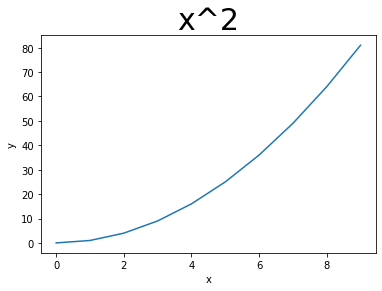

In [184]:
x = np.arange(0, 10)
y = x ** 2
plt.title('x^2', fontsize=30)
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x, y);

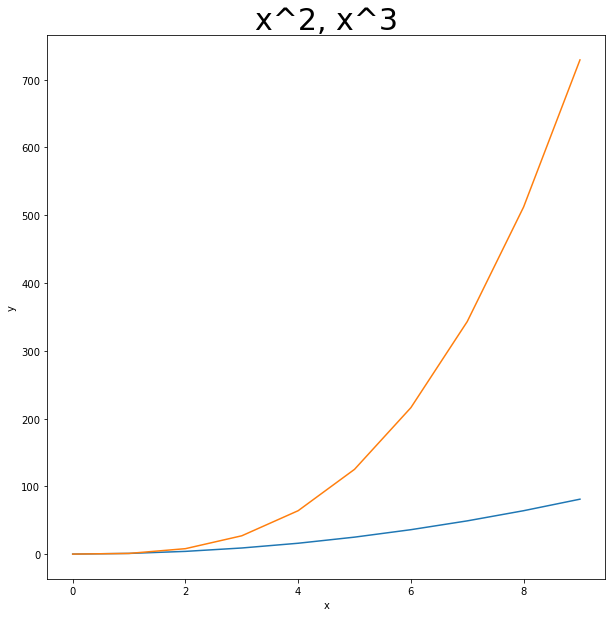

In [185]:
plt.figure(figsize=(10, 10))
x = np.arange(0, 10)
y = x ** 2
z = x ** 3
plt.title('x^2, x^3', fontsize=30)
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x, y)
plt.plot(x, z);

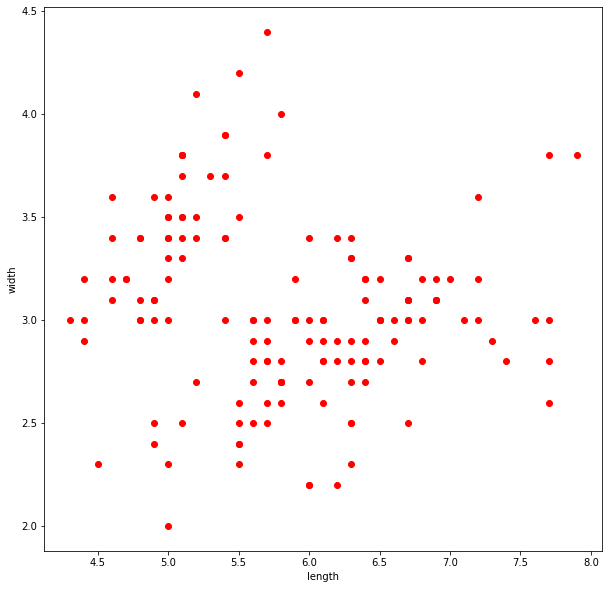

In [186]:
plt.figure(figsize=(10, 10))
plt.xlabel('length')
plt.ylabel('width')
plt.scatter(df['sepal.length'], df['sepal.width'], color='red');

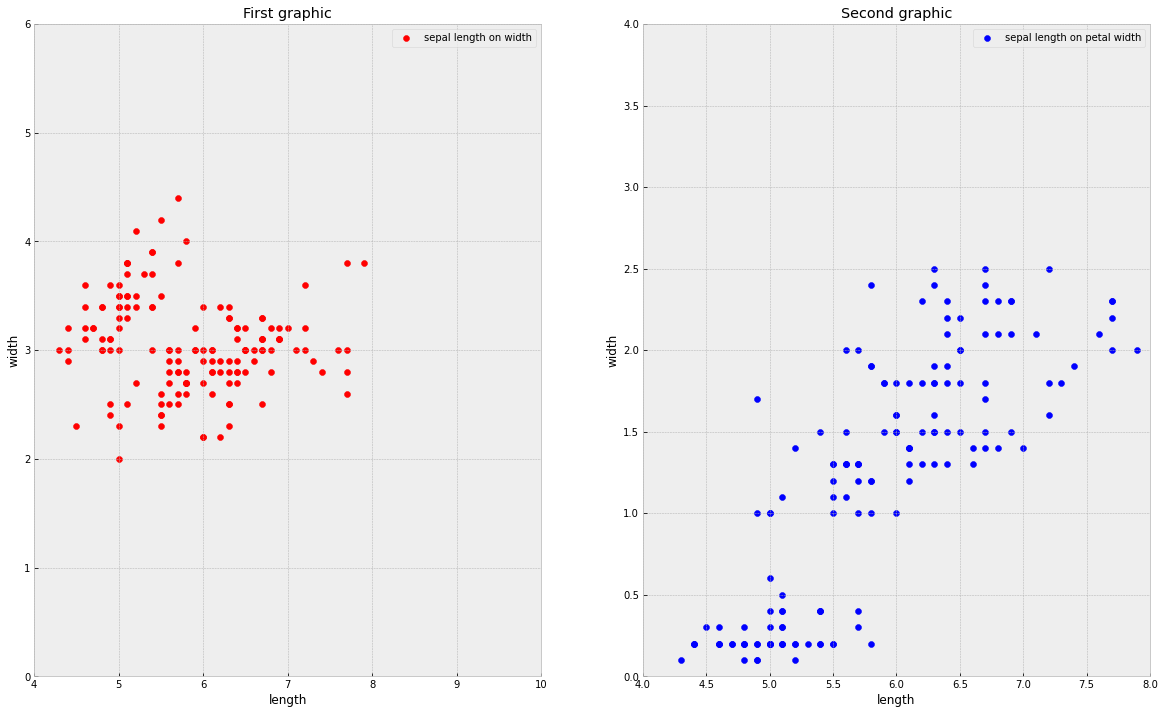

In [187]:
plt.style.use('bmh')
plt.figure(figsize=(20, 12))

plt.subplot(1, 2, 1)
plt.title('First graphic')
plt.xlabel('length')
plt.ylabel('width')
plt.scatter(df['sepal.length'], df['sepal.width'], color='red', label='sepal length on width')
plt.xlim(4, 10)
plt.ylim(0, 6)
plt.legend()

plt.subplot(1, 2, 2)
plt.title('Second graphic')
plt.xlabel('length')
plt.ylabel('width')
plt.scatter(df['sepal.length'], df['petal.width'], color='blue', label='sepal length on petal width')
plt.xlim(4, 8)
plt.ylim(0, 4)
plt.legend()

plt.show()

# Seaborn

Те же графики, только немного красивее, больше возможностей и больше автоматизации

In [188]:
!pip install seaborn

In [189]:
import seaborn as sns

Используем вместе с matplotlib

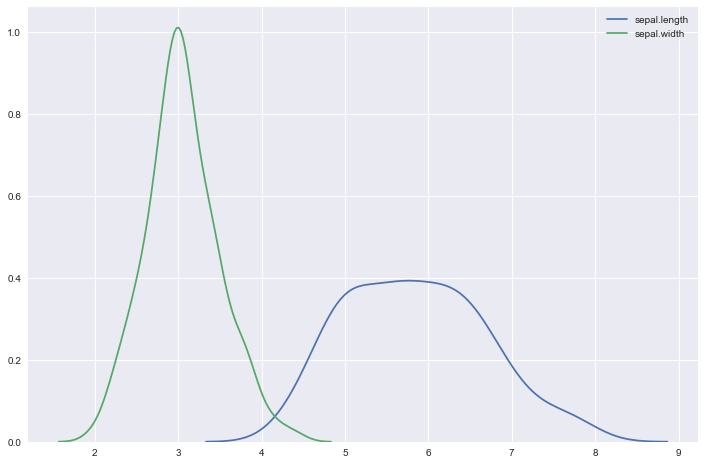

In [190]:
plt.style.use('seaborn')

plt.figure(figsize=(12, 8))
sns.kdeplot(df['sepal.length'])
sns.kdeplot(df['sepal.width'])
plt.show()

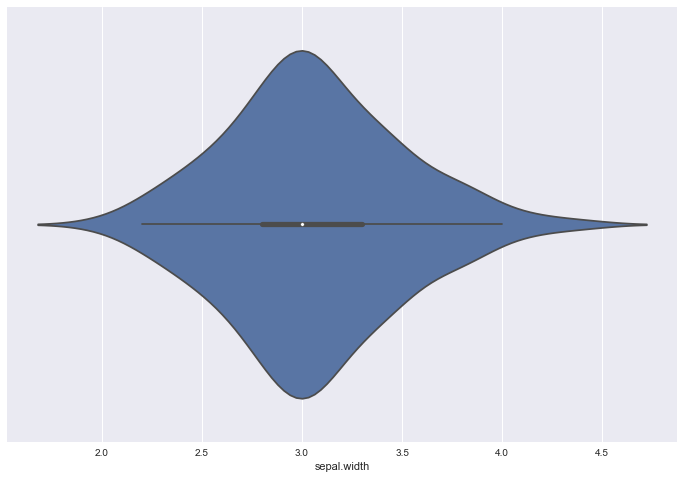

In [191]:
plt.figure(figsize=(12, 8))
sns.violinplot(df['sepal.width'])
plt.show()

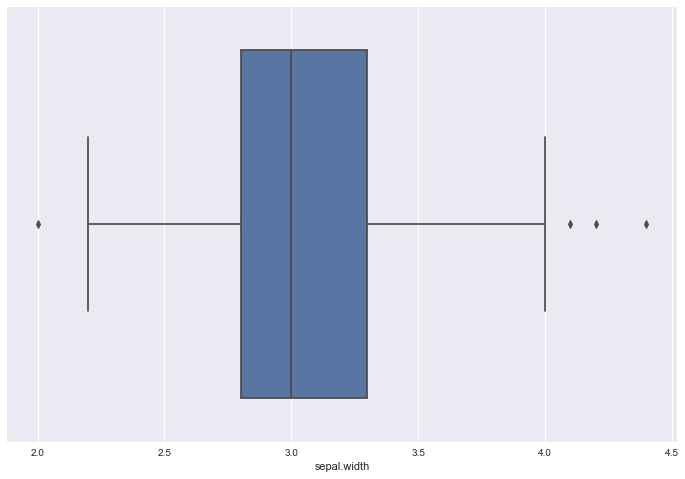

In [192]:
plt.figure(figsize=(12, 8))
sns.boxplot(df['sepal.width'])
plt.show()

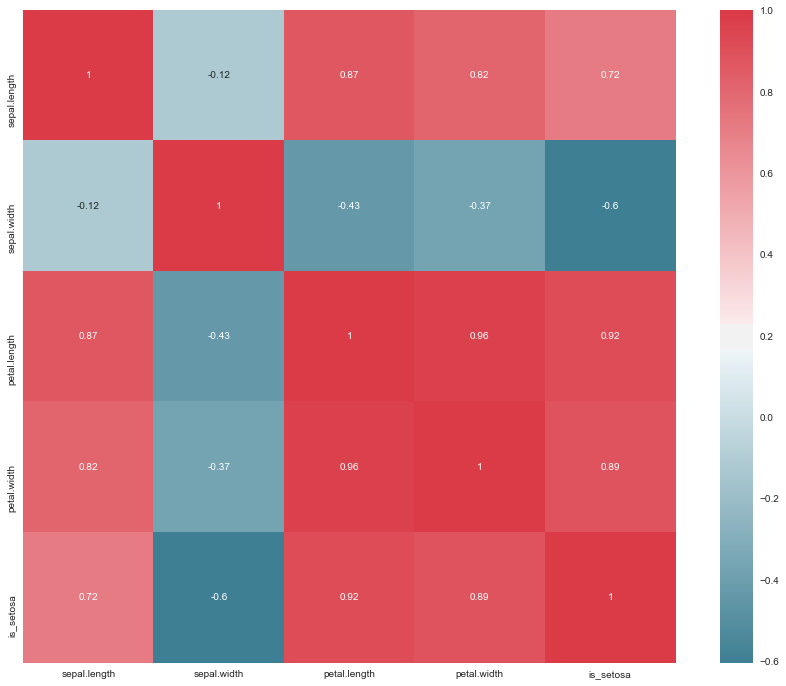

In [193]:
corr = df.corr()
plt.figure(figsize=(16, 12))
sns.heatmap(
    corr, 
    mask=np.zeros_like(corr, dtype=np.bool), 
    cmap=sns.diverging_palette(220, 10, as_cmap=True), 
    square=True,
    annot=True
)
plt.show()

Можно и так:

In [194]:
corr.style.background_gradient(cmap='coolwarm', axis=None)

In [200]:
df.corr()

sepal.length  sepal.width  petal.length  petal.width
sepal.length      1.000000    -0.117570      0.871754     0.817941
sepal.width      -0.117570     1.000000     -0.428440    -0.366126
petal.length      0.871754    -0.428440      1.000000     0.962865
petal.width       0.817941    -0.366126      0.962865     1.000000